In [35]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [23]:
colors = ['#082040', '#175073', '#3285A6', '#B8D0D9', '#6CC5D9']
New_data3 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Alghoritms_and_Data/New_data3.csv')
New_data3 = New_data3.drop('Unnamed: 0', axis=1)
display(New_data3)

,A,mu,alpha,r2,zpve,u0,cv,ABC,nAcid,nBase,...,fr_para_hydroxylation,fr_phenol,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_tetrazole,fr_urea,gap,smiles_code
0,3.42254,4.5643,67.77,972.8206,0.091971,-452.735916,24.110,7.099577,0,0,...,0,0,0,0,0,0,0,0,0.2048,14905.0
1,3.00351,1.9055,77.52,1039.1092,0.147846,-401.909060,29.799,7.662296,0,1,...,0,0,0,0,0,0,0,0,0.2091,15889.0
2,3.11416,1.6498,75.15,1166.1361,0.160480,-423.030316,29.829,6.990188,0,0,...,0,0,0,0,0,0,0,0,0.2215,16518.0
3,3.12126,3.6237,69.65,763.5215,0.127690,-400.695008,24.179,8.242641,0,0,...,0,0,0,0,0,0,0,0,0.2066,957.0
4,2.37047,1.7895,76.02,1039.3059,0.133262,-421.725719,33.112,7.232561,0,0,...,0,0,0,0,0,0,0,0,0.2569,4821.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,3.17605,3.0955,73.12,1033.0148,0.115102,-420.687271,26.087,7.099577,0,0,...,0,0,0,0,0,0,0,0,0.2127,19870.0
19979,3.12217,3.1791,69.13,927.9641,0.118744,-358.830448,28.421,5.794754,0,2,...,0,0,0,0,0,0,0,0,0.2075,8253.0
19980,3.40512,2.1467,67.72,1215.9934,0.123752,-475.063357,30.166,6.542301,0,0,...,0,0,0,0,0,0,0,0,0.2416,12920.0
19981,3.22232,1.4181,60.90,882.3828,0.129128,-420.823950,29.183,6.459522,0,0,...,0,0,0,0,0,0,0,0,0.2937,17803.0


6. Normalization

At this step, we normalize our data using the functions that took place at the lecture

In [24]:
New_data3_descriptors = pd.DataFrame()
New_data3_target = pd.DataFrame()
New_data3_tardet = New_data3['gap']
New_data3_descriptors = New_data3.drop(columns = ['gap','smiles_code'], axis=0)

In [25]:
# Предположим, что df уже определен как ваш датасет

# Нормализация данных
scaler = MinMaxScaler(feature_range=(-1, 1))

# Нормализация всего датасета
scaled_data = scaler.fit_transform(New_data3_descriptors)

# Преобразование массива обратно в DataFrame
New_data3_normalized = pd.DataFrame(scaled_data, columns=New_data3_descriptors.columns)

# Вывод результатов
print("Нормализованный датасет:")
New_data3_normalized



Нормализованный датасет:


,A,mu,alpha,r2,zpve,u0,cv,ABC,nAcid,nBase,...,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_tetrazole,fr_urea
0,-0.991439,-0.456537,-0.013087,-0.431531,-0.440644,-0.419829,-0.101429,0.613079,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-0.992487,-0.773116,0.143477,-0.392024,0.002072,-0.228069,0.180875,0.740933,-1.0,-0.6,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-0.992211,-0.803561,0.105420,-0.316317,0.102175,-0.307755,0.182364,0.588225,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-0.992193,-0.568533,0.017102,-0.556272,-0.157631,-0.223488,-0.098005,0.872792,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-0.994071,-0.786928,0.119390,-0.391907,-0.113482,-0.302833,0.345276,0.643294,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,-0.992056,-0.631424,0.072822,-0.395656,-0.257370,-0.298915,-0.003325,0.613079,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
19979,-0.992191,-0.621470,0.008752,-0.458265,-0.228513,-0.065541,0.112495,0.316613,-1.0,-0.2,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
19980,-0.991483,-0.744396,-0.013890,-0.286602,-0.188833,-0.504066,0.199087,0.486461,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
19981,-0.991940,-0.831149,-0.123404,-0.485431,-0.146237,-0.299431,0.150308,0.467653,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


PCA

In [26]:
# Применение метода главных компонент (PCA) для снижения размерности
# Создадим объект PCA
pca = PCA()

# Обучим PCA на данных
pca.fit(New_data3_normalized)

# Получим explained variance ratio для каждой компоненты
explained_variance_ratio = pca.explained_variance_ratio_

# Вычислим кумулятивную explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Найдем количество компонент, которые объясняют, например, 95% дисперсии
n_components = np.argmax(cumulative_explained_variance_ratio >= 0.95) + 1

print(f"Оптимальное количество компонент для объяснения 95% дисперсии: {n_components}")

Оптимальное количество компонент для объяснения 95% дисперсии: 81


In [27]:
pca = PCA(n_components=n_components)

transformed_data = pca.fit_transform(New_data3_normalized)

print(transformed_data)

[[ 1.38015243 -1.39679003  1.13870056 ...  0.1935558  -0.07216571
  -0.02854399]
 [-1.06570312 -1.03079817  0.16991268 ... -0.0667341  -0.11749211
  -0.0321893 ]
 [-1.00643926 -0.6611704  -0.49132989 ...  0.02901806 -0.04018022
   0.08901395]
 ...
 [ 1.62230554 -0.33293842 -1.22615822 ...  0.23393646 -0.00821194
  -0.16057877]
 [-0.12001611 -0.64090436 -1.41058948 ... -0.05640201  0.08538471
  -0.09512556]
 [ 0.07582212  1.66712038 -0.07810909 ... -0.15105828  0.07341589
  -0.01362677]]


In [28]:
transformed_df = pd.DataFrame(transformed_data)
transformed_df['gap'] = New_data3_tardet
transformed_df

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,gap
0,1.380152,-1.396790,1.138701,-0.623697,-1.355643,-0.229753,-0.820006,-0.558946,0.884561,0.440781,...,0.135974,0.131545,0.083316,-0.302492,-0.215202,-0.309829,0.193556,-0.072166,-0.028544,0.2048
1,-1.065703,-1.030798,0.169913,-0.661183,1.004171,0.433279,-0.314339,0.070277,0.377711,0.436077,...,-0.087863,-0.052102,-0.126836,0.134485,-0.134111,-0.041188,-0.066734,-0.117492,-0.032189,0.2091
2,-1.006439,-0.661170,-0.491330,-0.721637,-0.914620,1.018894,-0.500122,0.954780,-0.945301,-0.410209,...,0.039562,0.035099,-0.281481,0.027908,0.260281,-0.018476,0.029018,-0.040180,0.089014,0.2215
3,-0.935284,-1.524245,0.789035,-0.636435,-0.757559,0.669952,-0.347897,-0.335254,0.677201,0.103433,...,0.061798,0.103567,0.129725,0.129292,0.146679,-0.043799,0.022157,-0.039542,0.046371,0.2066
4,-0.771928,-0.356625,-0.328355,1.270920,-0.391627,-0.848272,-0.058318,0.116577,0.533072,-0.619930,...,0.078112,0.003992,-0.049615,-0.050855,-0.000559,0.004288,-0.065564,0.152518,0.172743,0.2569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,0.289431,-0.622220,1.656522,-0.605985,-1.066020,0.530498,-1.359531,-0.656393,0.696412,0.663741,...,0.167978,-0.025720,0.067494,-0.277572,-0.176632,-0.108451,-0.135686,-0.199602,0.144917,0.2127
19979,0.693489,-0.112332,0.076076,0.098001,1.266993,0.074717,0.834136,0.385235,0.896887,-0.584944,...,0.220066,0.062288,-0.176342,-0.043900,-0.158691,-0.104343,0.041672,-0.014929,-0.120703,0.2075
19980,1.622306,-0.332938,-1.226158,0.071454,-0.221010,-0.013198,-1.452157,-0.269693,-0.189780,-0.261478,...,-0.004360,-0.068835,0.069521,0.154838,-0.130064,-0.131027,0.233936,-0.008212,-0.160579,0.2416
19981,-0.120016,-0.640904,-1.410589,0.968683,-1.379739,-0.722806,0.581868,0.252234,0.736860,0.328075,...,-0.149425,-0.083600,0.032811,-0.096312,-0.054456,0.047740,-0.056402,0.085385,-0.095126,0.2937


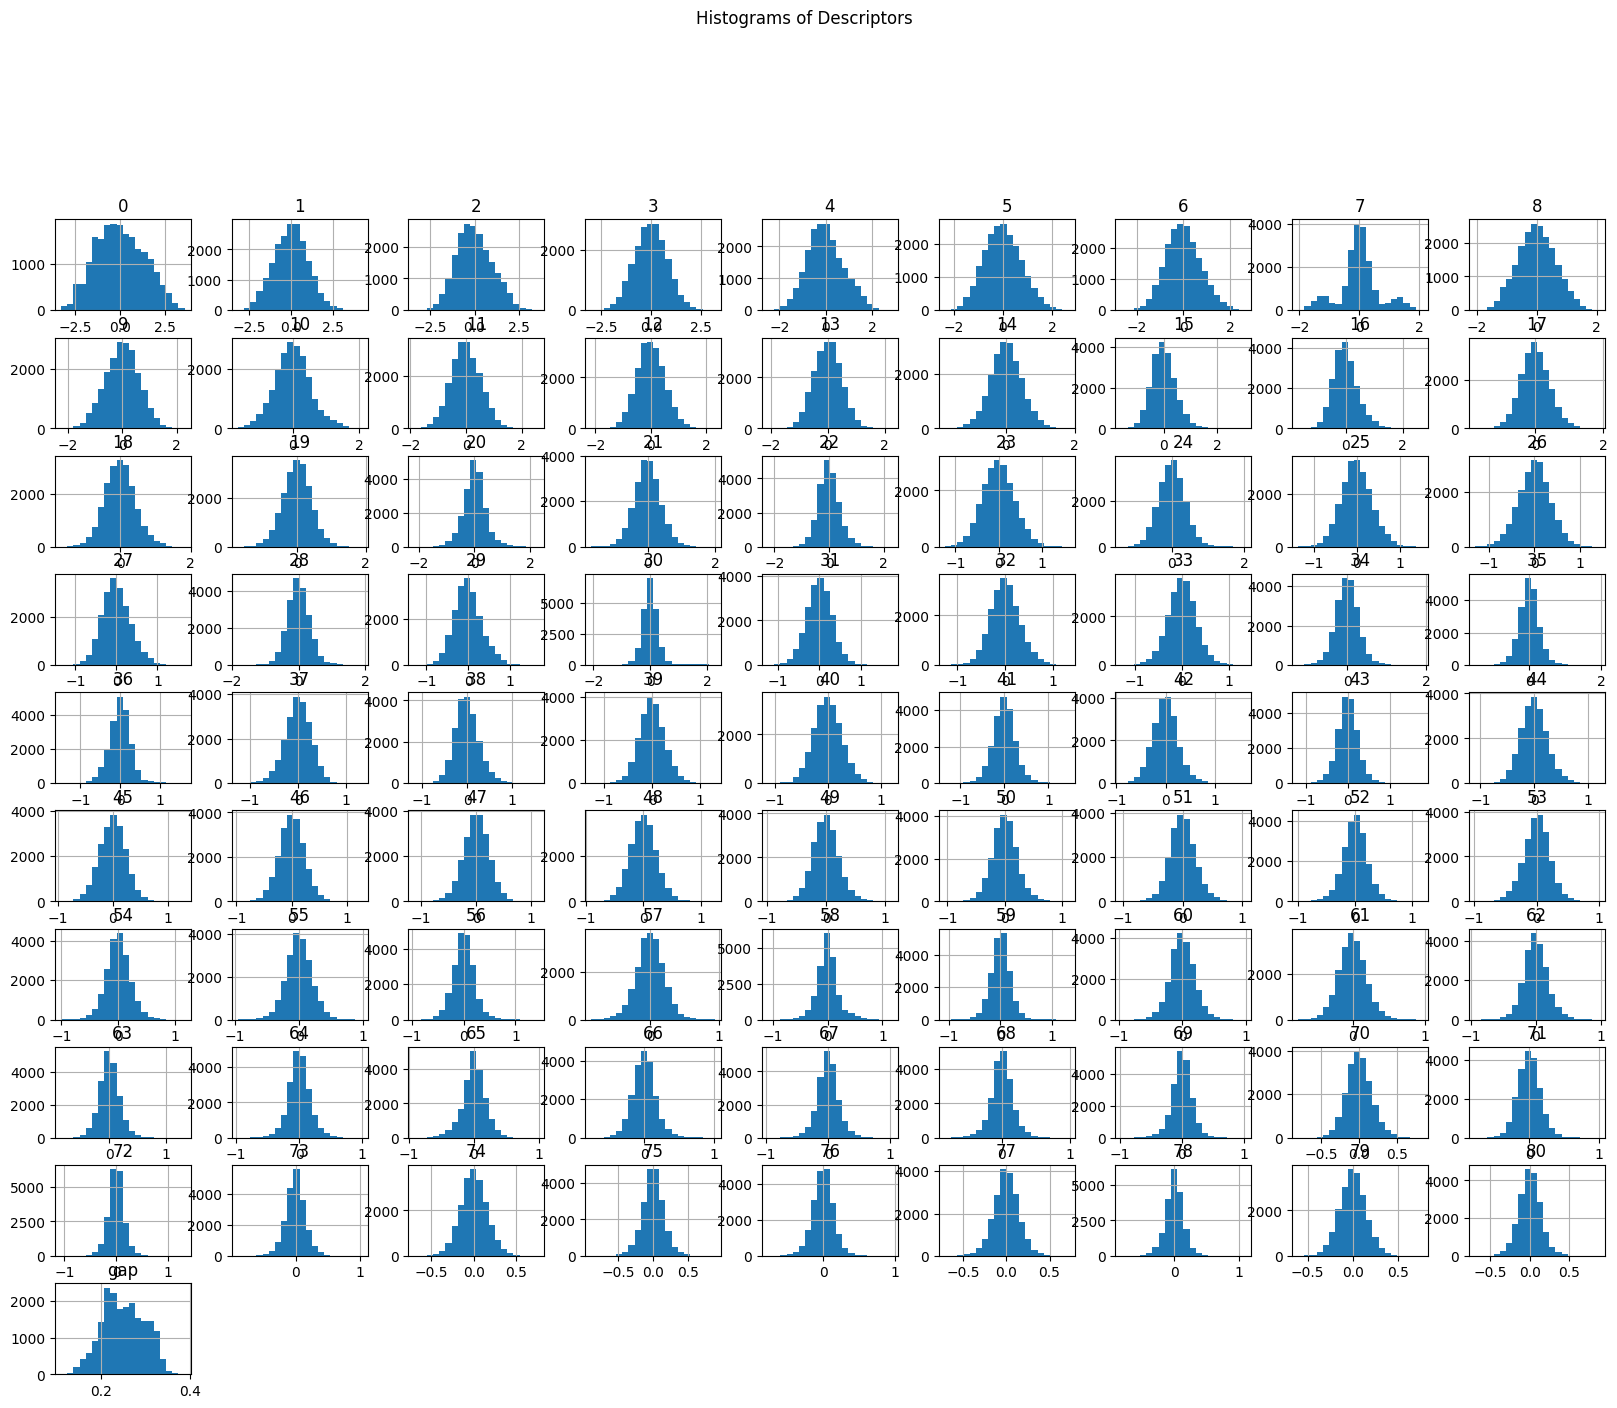

In [29]:
# sns.pairplot(transformed_df.iloc[:,range(5)], size=3.0)
# Построение гистограмм для каждого дескриптора
transformed_df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of Descriptors', x=0.5, y=1.02)
plt.show()






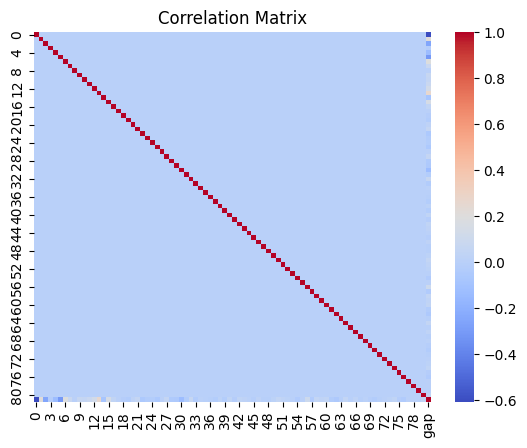

In [30]:
# Построение матрицы корреляции
correlation_matrix = transformed_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


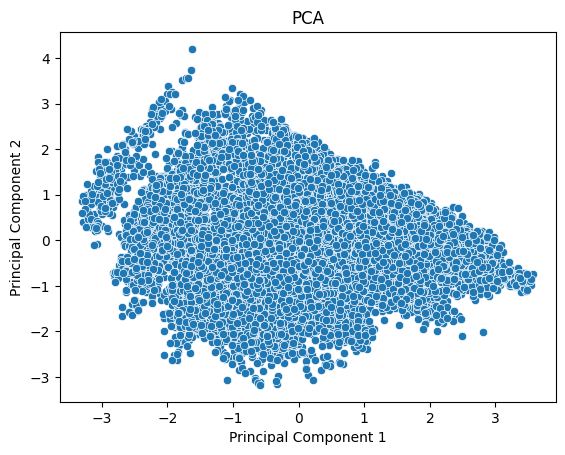

In [31]:

sns.scatterplot(x=transformed_data[:, 0], y=transformed_data[:, 1])
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


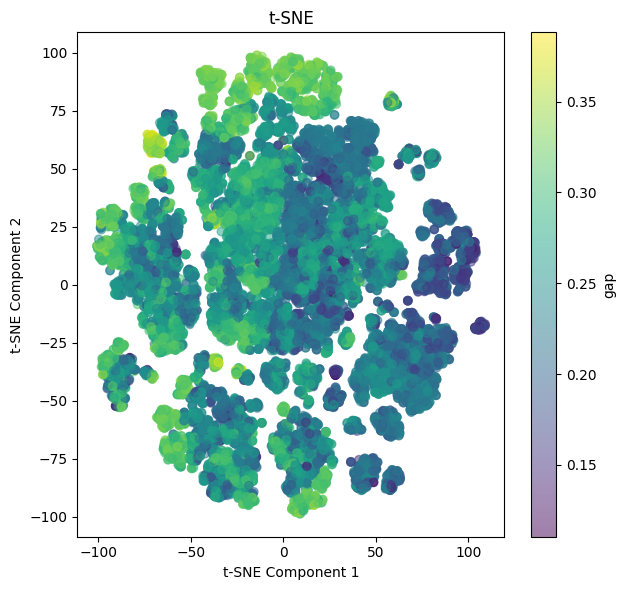

In [39]:

# Получение значения из столбца 'gap' как целевой переменной y
y = transformed_df['gap'].values
X = New_data3_normalized
# Применение t-SNE
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

# Создаем новое окно графика
plt.figure(figsize=(12, 6))

# График для t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='gap')

# Показываем графики
plt.tight_layout()
plt.show()

In [40]:
transformed_df.to_csv('/content/drive/MyDrive/Colab_Notebooks/Alghoritms_and_Data/transformed_df.csv')